This Project is inspired by A book called <strong> The Data Analysis Workshop<strong> written by (Gururajan Govindan, Shubhangi Hora, and Konstantin Palagachev)

## Importing the main libraries and data

In [71]:
# imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# To import the dataset
import os
#T test importing
from scipy.stats import ttest_1samp
%matplotlib inline

In [37]:
#loading the dataset
filepath = os.path.join(os.getcwd(),'hour.csv')
hourly_data =pd.read_csv(filepath)

## Data exploration

In [38]:
# print some generic statistics about the data
#Printing the Shape of the data
print(f"Shape of data: {hourly_data.shape}")

#Printing the Number of Total Missing Values,, Note Here you will find 2 Sums() 
# first one to Calc the sum in Every row,
# Second one to Calc the sum overall

print(f"Number of missing values in the data: {hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data: 0


In [39]:
# get statistics on the numerical columns
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [40]:
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## PreProcessing

In [41]:
# create a copy of the original data AS a roleback if anything went wrong
preprocessed_data = hourly_data.copy()

### Trasnforming

We will be working on the following Columns
- Season (Winter : 1, Spring : 2, Summer : 3  and Fall : 4)
- Year (2011 : 0 , 2012 : 1)
- Weekday (Saturday , Sunday, Monday, Tuesday, Wednesday, Thursday)


In [42]:
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

In [43]:
# Printing the Unique Values
preprocessed_data['season'].unique()

array(['winter', 'spring', 'summer', 'fall'], dtype=object)

In [44]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

In [45]:
# Printing the Unique Values
preprocessed_data['yr'].unique()

array([2011, 2012], dtype=int64)

In [46]:
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday',6: 'Saturday'} 
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

In [47]:
# Printing the Unique Values
preprocessed_data['weekday'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [48]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

In [49]:
# Printing the Unique Values
preprocessed_data['weathersit'].unique()

array(['clear', 'cloudy', 'light_rain_snow', 'heavy_rain_snow'],
      dtype=object)

In [50]:
preprocessed_data['windspeed'].value_counts()

0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.7463       2
0.8060       2
0.8507       2
0.7164       2
0.7761       1
0.8358       1
Name: windspeed, dtype: int64

In [51]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] *83

In [52]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,11.1469
7823,fall,2011,Sunday,clear,43.0,38.4041
15426,fall,2012,Tuesday,cloudy,77.0,7.4368
15028,fall,2012,Sunday,clear,51.0,27.2572
12290,spring,2012,Friday,cloudy,89.0,16.1020
3262,spring,2011,Friday,clear,64.0,8.6735
10763,spring,2012,Thursday,clear,42.0,29.7306
12384,spring,2012,Tuesday,light_rain_snow,82.0,13.6286
6051,summer,2011,Wednesday,clear,52.0,23.5388
948,winter,2011,Saturday,clear,80.0,0.0000


## Analysis Part

In [53]:
"""
assert that total number of rides is equal to the sum of registered and 
casual ones
"""
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), \
'Sum of casual and registered rides not equal to total number of rides'

C:\Users\Tariq\AppData\Local\Temp\ipykernel_3648\1289535383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['registered'], label='registered')
C:\Users\Tariq\AppData\Local\Temp\ipykernel_3648\1289535383.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['

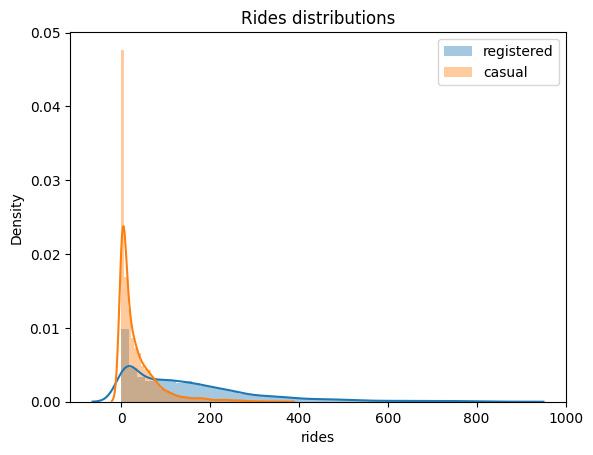

In [54]:
# look at their distributions
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions");
plt.savefig('figs/rides_distributions.png', format='png')

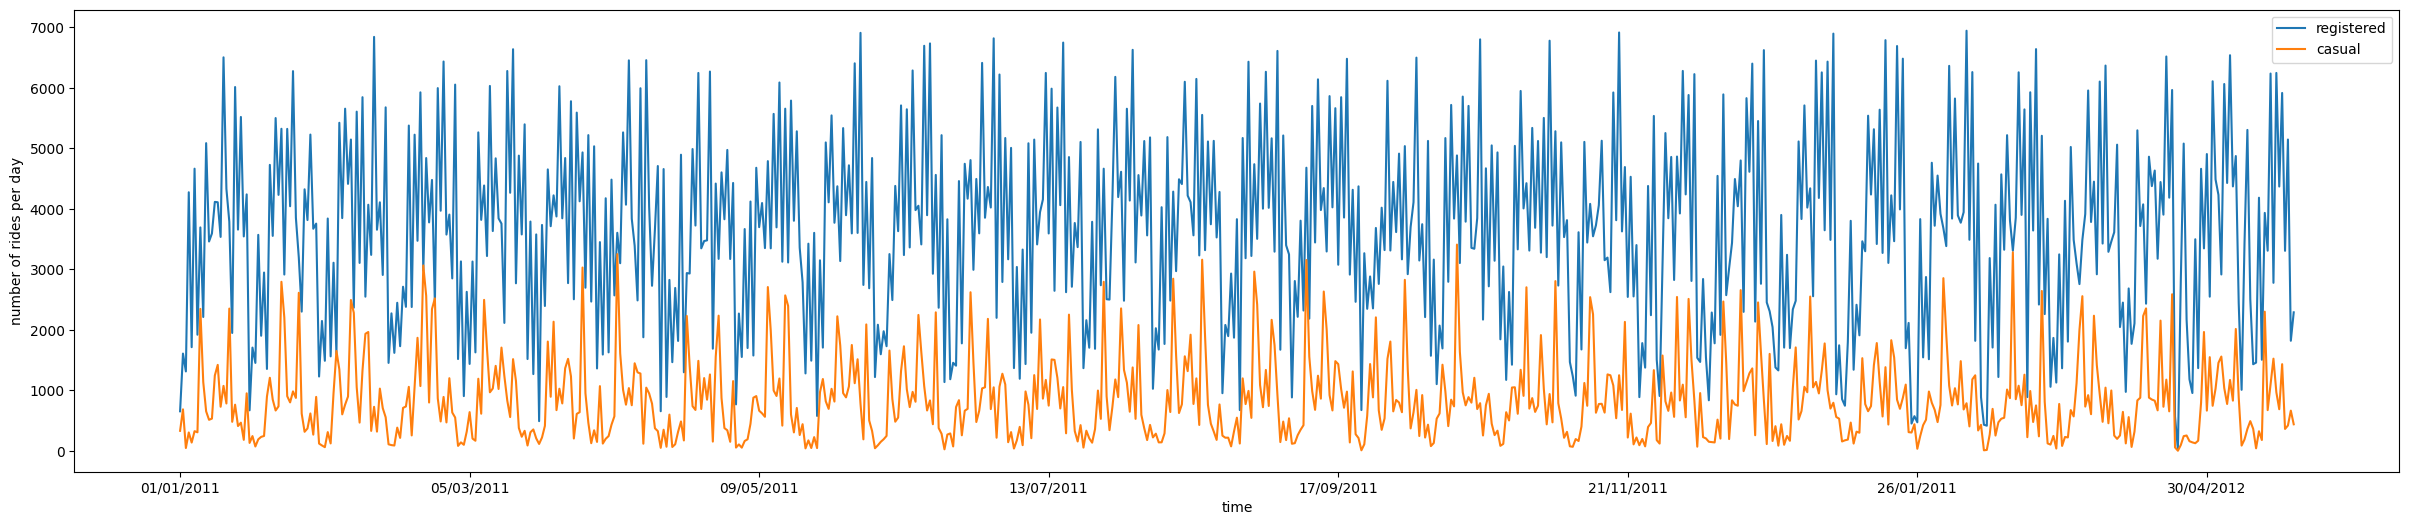

In [55]:
# plot evolution of rides over time

plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(30,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('figs/rides_daily.png', format='png')

In [56]:
preprocessed_data[preprocessed_data['dteday'] == '01/01/2011']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,81.0,0.0000,3,13,16
1,2,01/01/2011,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,80.0,0.0000,8,32,40
2,3,01/01/2011,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,80.0,0.0000,5,27,32
3,4,01/01/2011,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,75.0,0.0000,3,10,13
4,5,01/01/2011,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,75.0,0.0000,0,1,1
5,6,01/01/2011,winter,2011,1,5,0,Saturday,0,cloudy,0.24,0.2576,75.0,7.4368,0,1,1
6,7,01/01/2011,winter,2011,1,6,0,Saturday,0,clear,0.22,0.2727,80.0,0.0000,2,0,2
7,8,01/01/2011,winter,2011,1,7,0,Saturday,0,clear,0.20,0.2576,86.0,0.0000,1,2,3
8,9,01/01/2011,winter,2011,1,8,0,Saturday,0,clear,0.24,0.2879,75.0,0.0000,1,7,8
9,10,01/01/2011,winter,2011,1,9,0,Saturday,0,clear,0.32,0.3485,76.0,0.0000,8,6,14


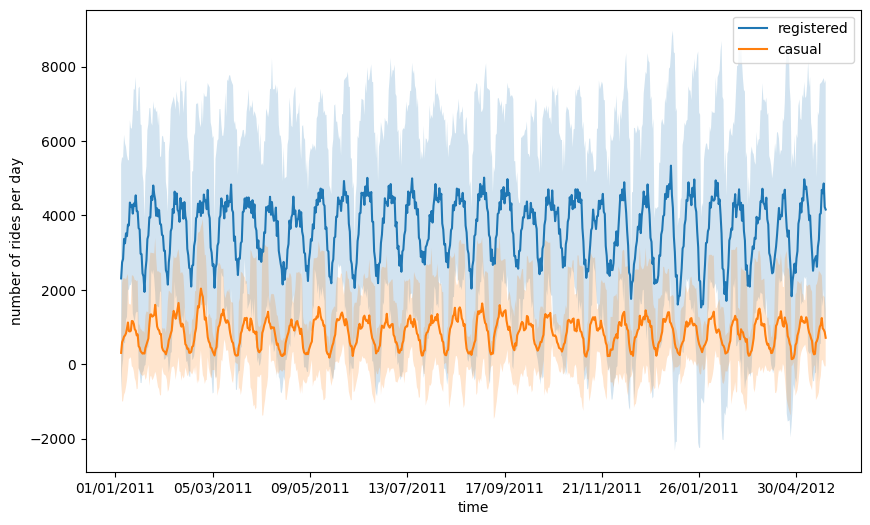

In [57]:
"""
Create new dataframe with necessary for plotting columns, and obtain 
number of rides per day, by grouping over each day
"""

plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling 
means, then we color the zone between the series of rolling means +- 2 
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                + 2*rolling_deviations['registered'], \
                rolling_means['registered'] \
                - 2*rolling_deviations['registered'], \
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] \
                + 2*rolling_deviations['casual'], \
                rolling_means['casual'] \
                - 2*rolling_deviations['casual'], \
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('figs/rides_aggregated.png', format='png')

In [58]:
# Lets now see a  graph to help us see the customers across the day across the week

# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

# transform the data into a format, in number of entries are computed as 
# count, 
# for each distinct hr, weekday and type (registered or casual)


D:\Files Should have been in C\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


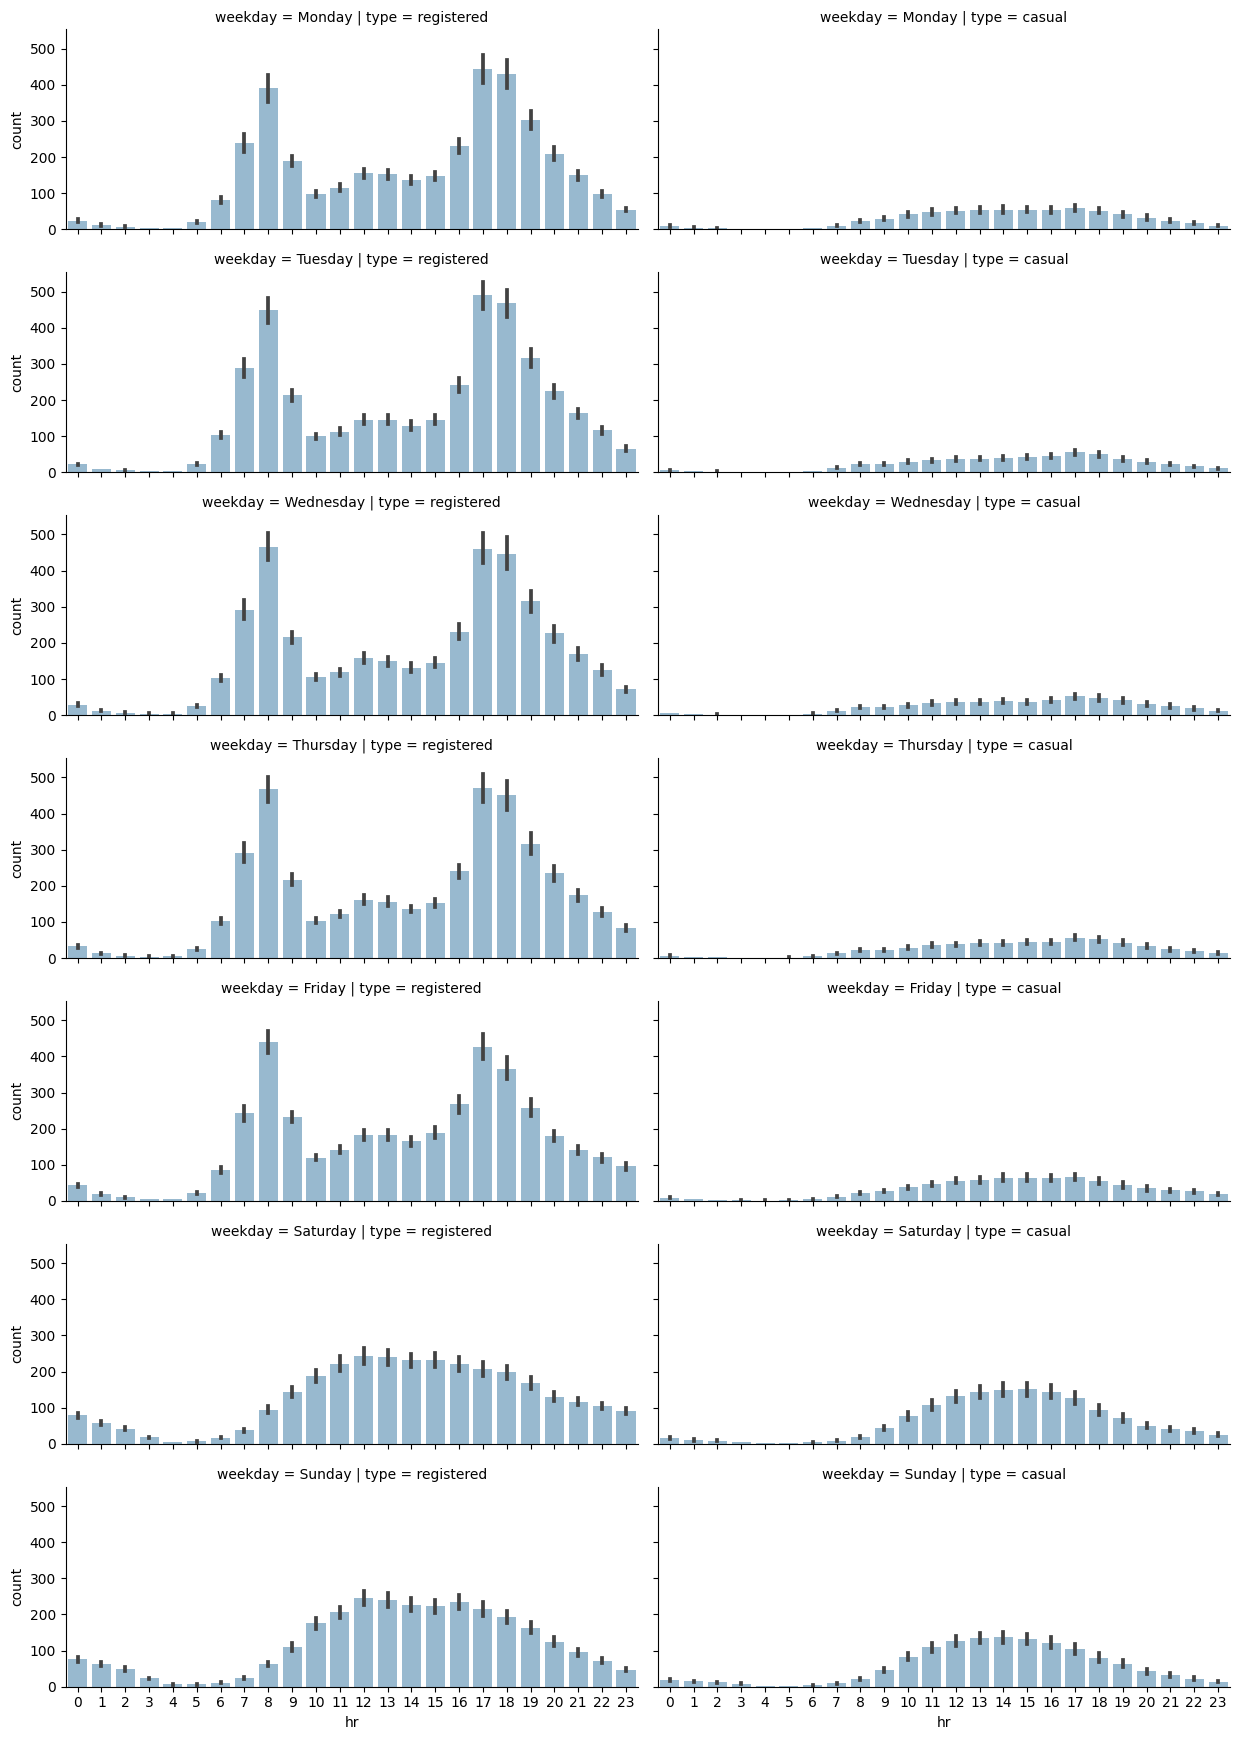

In [59]:
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5, row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
'Friday', 'Saturday', 'Sunday'])

# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figs/weekday_hour_distributions.png', format='png')

In [60]:
# investigate the impact of the different seasons on the total number of rides
# select subset of the data
plot_data = preprocessed_data[['hr', 'season', 'registered', 'casual']]

D:\Files Should have been in C\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


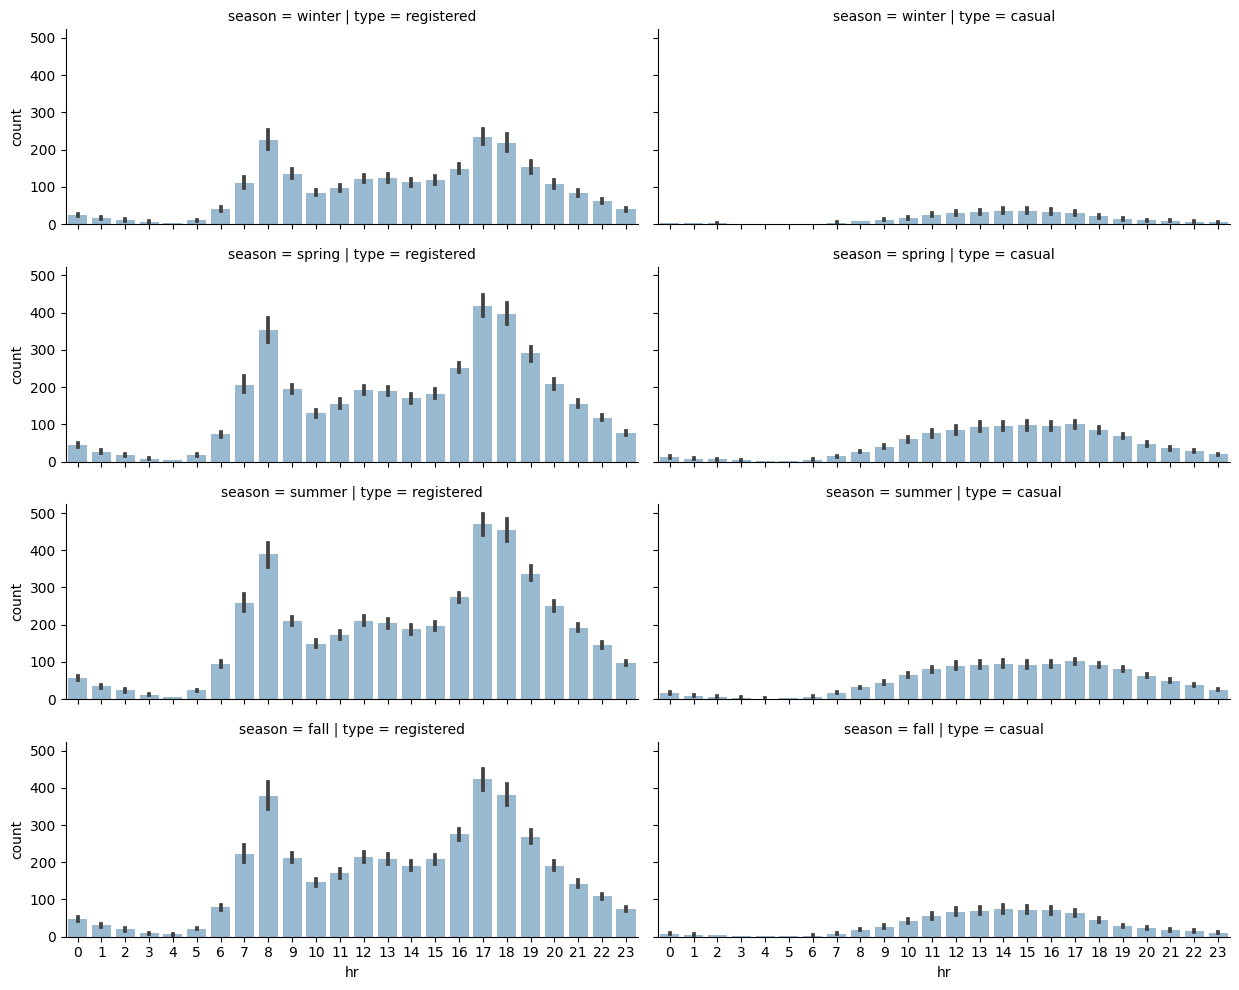

In [61]:
# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', value_name='count')
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', 
                     col='type', height=2.5, 
                     aspect=2.5, 
                     row_order=['winter', 'spring', 
                                'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
# save figure
grid.savefig('figs/exercise_1_02_a.png', format='png');

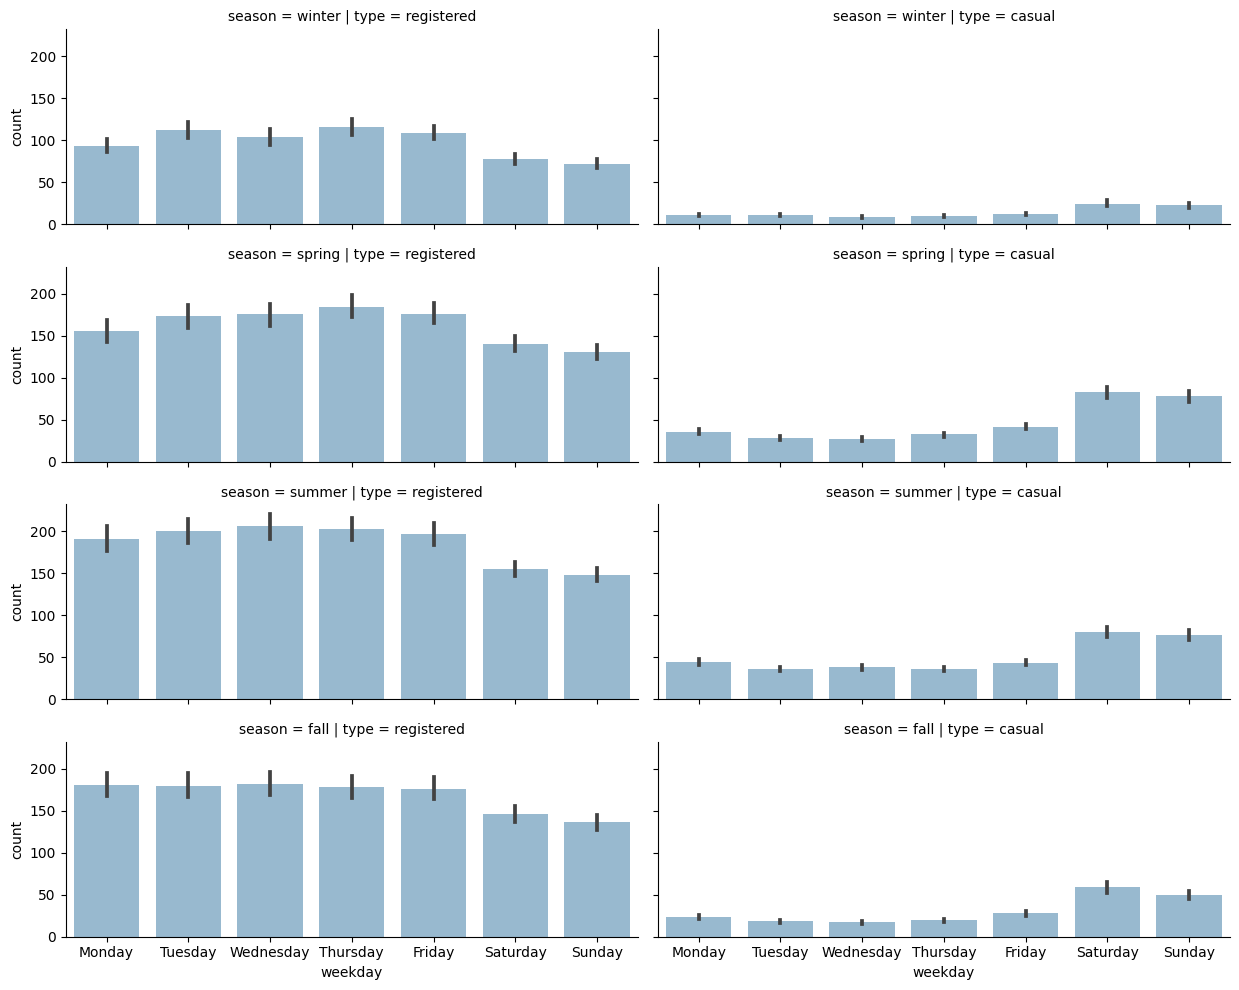

In [62]:
# the distribution of rides on a weekday basis
plot_data = preprocessed_data[['weekday', 'season','registered', 'casual']]

# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, row_order=['winter', 
                                                                                             'spring', 'summer', 'fall'])

grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, \
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### Hypothsis testing

In [66]:
# Estimating Average Registered Rides
# compute population mean of registered rides
population_mean = preprocessed_data['registered'].mean()

In [72]:
# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season == "summer") & (preprocessed_data.yr == 2011)].registered

In [75]:
# perform t-test and compute p-value
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]}, p-value: {test_result[1]}")

Test statistic: -3.4919691483786197, p-value: 0.0004887645279519505


In [80]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, \
 population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]}, \
p-value: {test_result_unbiased[1]}")

Unbiased test statistic: -0.34331336037427684, p-value: 0.7314458645805612
